In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.datasets.samples_generator import make_regression
import pandas as pd

In [2]:
%matplotlib inline

#Load the diabetes dataset

In [3]:
diabetes = datasets.load_diabetes()

Because the diabetes dataset is unlabeled and somewhat confusing (read: complex) we want to simplify and only calculate the regression line for one feature. A little numpy magic below and our diabetes_x_temp gives us our single feature we need.

In [5]:
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

We then split the data up between two groups train and test. Of course we don't want to train and test against the same data! We know that's bad!

In [11]:
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

Here we access the ```target``` attribute on our dataset. This will give us our valid Y ```train``` and ```test``` data.

In [12]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

To create a Linear Regression classifier we just instantiate the ```LinearRegression``` class and fit our ```X_train``` and ```y_train``` data into our classifier.

In [13]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lets print some data about our Regression line.

In [14]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
mean_square_error = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
print("Residual sum of squares: {}".format(mean_square_error))

# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(regr.score(diabetes_X_test, diabetes_y_test)))

Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.0723987259694
Variance score: 0.47257544798227147


If we wanted to take a look at our X test inputs and their respective predictions we could do this:

In [15]:
print("Inputed X: ", diabetes_X_test)
print("Predicted Y: ", regr.predict(diabetes_X_test))

Inputed X:  [[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]
Predicted Y:  [ 225.9732401   115.74763374  163.27610621  114.73638965  120.80385422
  158.21988574  236.08568105  121.81509832   99.56772822  123.83758651
  204.73711411   96.53399594  154.17490936  130.91629517   83.3878227
  171.36605897  137.99500384  137.99500384  189.56845268   84.3990668 ]


And why not? Let's plot our data!

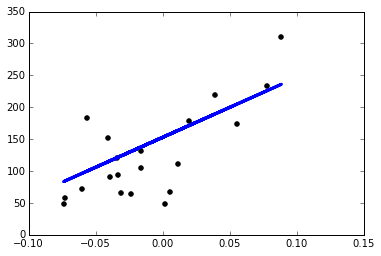

In [16]:
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
        linewidth=3)
plt.show()

In [18]:
gnb = linear_model.BayesianRidge()

In [19]:
gnb.fit(diabetes_X_train, diabetes_y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [20]:
gnb.score(diabetes_X_test, diabetes_y_test)

0.47152668726442892